# 1. EDA & Data Preprocessing

In [72]:
!pip install spacy nltk
!python -m spacy download ru_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 38.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import spacy
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from spacy import load

In [74]:
df = pd.read_csv('labeled.csv')
df['toxic'] = df['toxic'].astype(int)
df.head()

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1
1,"Хохлы, это отдушина затюканого россиянина, мол...",1
2,Собаке - собачья смерть\n,1
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1


In [75]:
print(f"{df.head()}\n")
print(df.info())

                                             comment  toxic
0               Верблюдов-то за что? Дебилы, бл...\n      1
1  Хохлы, это отдушина затюканого россиянина, мол...      1
2                          Собаке - собачья смерть\n      1
3  Страницу обнови, дебил. Это тоже не оскорблени...      1
4  тебя не убедил 6-страничный пдф в том, что Скр...      1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14412 entries, 0 to 14411
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  14412 non-null  object
 1   toxic    14412 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 225.3+ KB
None


In [76]:
df.isnull().sum()

,0
comment,0
toxic,0


In [77]:
class_counts = df['toxic'].value_counts()
class_counts

,count
toxic,
0,9586
1,4826


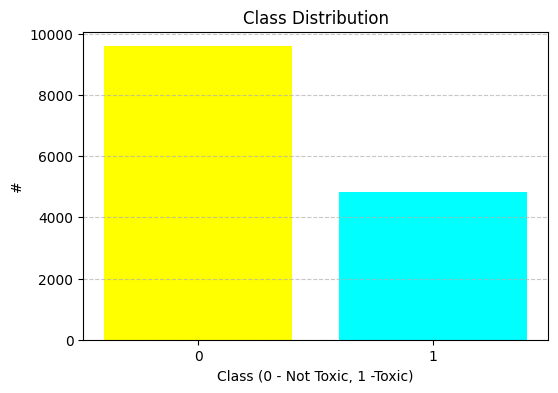

In [78]:
plt.figure(figsize=(6, 4))
plt.bar(class_counts.index.astype(str), class_counts.values, color=['yellow', 'cyan'])
plt.xlabel('Class (0 - Not Toxic, 1 -Toxic)')
plt.ylabel('#')
plt.title('Class Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

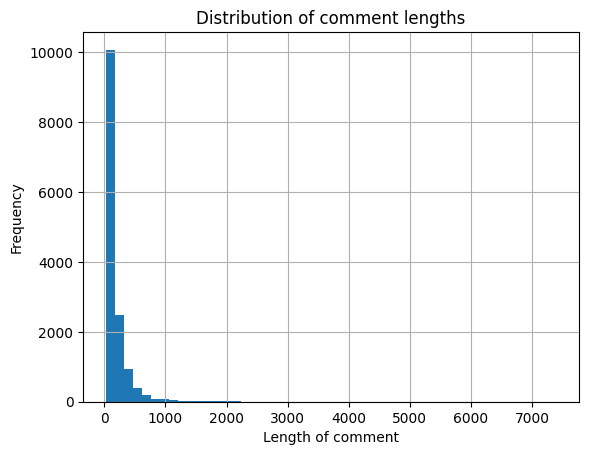

In [79]:
df['comment_length'] = df['comment'].apply(len)
df['comment_length'].hist(bins=50)
plt.xlabel('Length of comment')
plt.ylabel('Frequency')
plt.title('Distribution of comment lengths')
plt.show()

In [80]:
X = df['comment']
y = df['toxic']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [82]:
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 11529
Test set size: 2883


In [83]:
nlp_ru = spacy.load('ru_core_news_sm')

In [84]:
nltk.download('stopwords')
stop_words = stopwords.words('russian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [85]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    doc = nlp_ru(text)
    lemmatized_tokens = [token.lemma_ for token in doc if not token.is_punct and not token.is_space]
    lemmatized_tokens = [word for word in lemmatized_tokens if word not in stop_words]
    return ' '.join(lemmatized_tokens)

X_train_cleaned = X_train.apply(clean_text)
X_test_cleaned = X_test.apply(clean_text)

In [86]:
example = X_train.iloc[0:5]
print(example.apply(clean_text))

9199    читать закон банкротство объявить банкрот нужн...
1570                                  сяоми это постоянно
7351    хотеть занять дапроще позвонить заниматьшорт п...
4632    заработок работа небольшой плюс устраиваться с...
8939                          езжу каждый день год 30 тыс
Name: comment, dtype: object


In [87]:
X_train_cleaned.head()

,comment
9199,читать закон банкротство объявить банкрот нужн...
1570,сяоми это постоянно
7351,хотеть занять дапроще позвонить заниматьшорт п...
4632,заработок работа небольшой плюс устраиваться с...
8939,езжу каждый день год 30 тыс


In [88]:
tfidfvec = TfidfVectorizer(max_features=15000, stop_words=stop_words, lowercase=True, ngram_range=(1, 2))

In [89]:
X_train_tfidf = tfidfvec.fit_transform(X_train_cleaned).toarray()
X_test_tfidf = tfidfvec.transform(X_test_cleaned).toarray()

In [90]:
X_train_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [91]:
pd.DataFrame(X_train_tfidf)

,0,1,2,3,4,5,6,7,8,9,...,14990,14991,14992,14993,14994,14995,14996,14997,14998,14999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
pd.DataFrame(X_train_tfidf, columns = tfidfvec.get_feature_names_out())

,000,000 000,000 руб,000 рубль,04,05,051117,07,08,10,...,ячейка,ящик,ёбаный,ёбаный дегенерат,ёбаный рот,ёбаный хуя,ёжик,ёй,ёлка,ёмкость
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
non_zero_elements = X_train_tfidf.nonzero()

print(f"# of non-null elements: {len(non_zero_elements[0])}")

# of non-null elements: 163547


# 2. Model Training & Evaluation

**1. Logistic Regression**


In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [95]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 500, 1000]
}

In [96]:
log_reg = LogisticRegression(class_weight='balanced')

In [97]:
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_tfidf, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'max_iter': [100, 500, 1000],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy', verbose=1)

In [98]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'C': 1, 'max_iter': 100, 'solver': 'liblinear'}
Best score: 0.8650360372733207


In [99]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_tfidf)

In [100]:
from sklearn.metrics import classification_report
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names = ['Not Toxic', 'Toxic']))

Classification Report:
              precision    recall  f1-score   support

   Not Toxic       0.89      0.90      0.90      1918
       Toxic       0.79      0.79      0.79       965

    accuracy                           0.86      2883
   macro avg       0.84      0.84      0.84      2883
weighted avg       0.86      0.86      0.86      2883



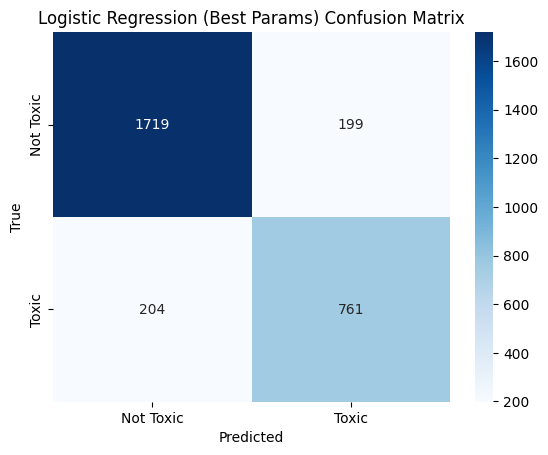

In [101]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Toxic', 'Toxic'], yticklabels=['Not Toxic', 'Toxic'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Logistic Regression (Best Params) Confusion Matrix')
plt.show()

**2. SVM**

In [102]:
from sklearn.svm import SVC

In [103]:
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train_tfidf, y_train)

SVC(C=1, kernel='linear')

In [104]:
y_pred_svm = svm_model.predict(X_test_tfidf)

In [105]:
print('Classification Report:')
print(classification_report(y_test, y_pred_svm, target_names = ['Not Toxic', 'Toxic']))

Classification Report:
              precision    recall  f1-score   support

   Not Toxic       0.85      0.94      0.89      1918
       Toxic       0.84      0.68      0.75       965

    accuracy                           0.85      2883
   macro avg       0.85      0.81      0.82      2883
weighted avg       0.85      0.85      0.85      2883



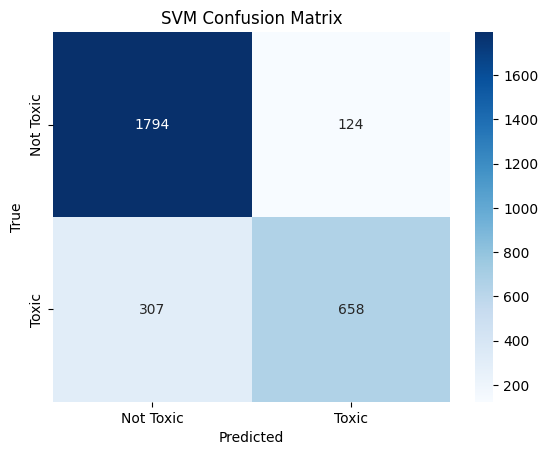

In [106]:
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Toxic', 'Toxic'], yticklabels=['Not Toxic', 'Toxic'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SVM Confusion Matrix')
plt.show()

**3. LSTM**

In [107]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
from collections import Counter

In [108]:
X_train_tokens = X_train_cleaned.apply(lambda x: x.split())
X_test_tokens = X_test_cleaned.apply(lambda x: x.split())

In [109]:
all_tokens = [token for tokens in X_train_tokens for token in tokens]
vocab = ['<PAD>', '<UNK>'] + [word for word, count in Counter(all_tokens).items() if count > 1]
word2idx = {word: idx for idx, word in enumerate(vocab)}

def encode(tokens):
    return [word2idx.get(token, word2idx['<UNK>']) for token in tokens]

X_train_encoded = X_train_tokens.apply(encode)
X_test_encoded = X_test_tokens.apply(encode)

In [110]:
class ToxicDataset(Dataset):
    def __init__(self, X, y):
        self.X = [torch.tensor(x, dtype=torch.long) for x in X]
        self.y = torch.tensor(y.values, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

def collate_fn(batch):
    X, y = zip(*batch)
    X_pad = pad_sequence(X, batch_first=True, padding_value=0)
    return X_pad, torch.tensor(y)

In [111]:
train_ds = ToxicDataset(X_train_encoded, y_train)
test_ds = ToxicDataset(X_test_encoded, y_test)
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True, collate_fn=collate_fn)
test_dl = DataLoader(test_ds, batch_size=32, collate_fn=collate_fn)

In [112]:
class LSTM(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.dropout = nn.Dropout(0.5)
        self.fc = nn.Linear(hidden_dim * 2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        _, (h_n, _) = self.lstm(x)
        h_cat = torch.cat((h_n[-2], h_n[-1]), dim=1)
        out = self.fc(self.dropout(h_cat))
        return self.sigmoid(out).squeeze()

In [113]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTM(vocab_size=len(vocab), embed_dim=100, hidden_dim=64).to(device)

In [114]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCELoss()

In [115]:
train_losses = []
val_losses = []

for epoch in range(10):
    model.train()
    total_train_loss = 0
    for X_batch, y_batch in train_dl:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()
    train_losses.append(total_train_loss)

    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in test_dl:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            output = model(X_batch)
            loss = criterion(output, y_batch)
            total_val_loss += loss.item()
    val_losses.append(total_val_loss)

    print(f"Epoch {epoch+1}: Train Loss = {total_train_loss:.4f} | Test Loss = {total_val_loss:.4f}")

Epoch 1: Train Loss = 210.5258 | Test Loss = 44.6877
Epoch 2: Train Loss = 142.5698 | Test Loss = 37.1718
Epoch 3: Train Loss = 97.6534 | Test Loss = 35.9895
Epoch 4: Train Loss = 120.5567 | Test Loss = 40.2947
Epoch 5: Train Loss = 77.6705 | Test Loss = 37.7595
Epoch 6: Train Loss = 49.9683 | Test Loss = 40.4975
Epoch 7: Train Loss = 34.3313 | Test Loss = 45.1025
Epoch 8: Train Loss = 25.5423 | Test Loss = 51.2614
Epoch 9: Train Loss = 18.3358 | Test Loss = 56.1610
Epoch 10: Train Loss = 14.4909 | Test Loss = 60.9286


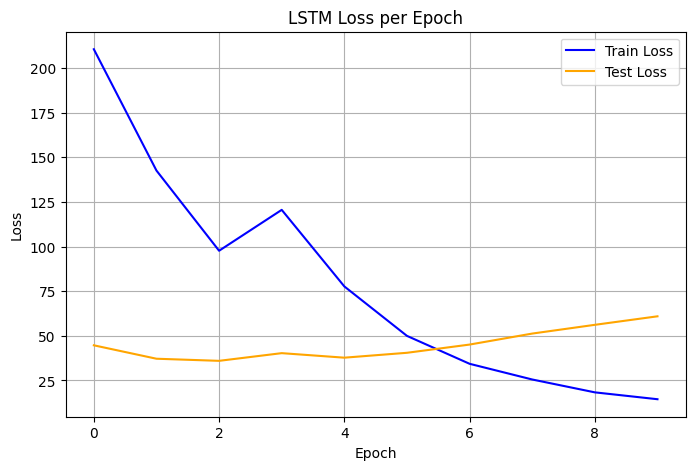

In [116]:
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Train Loss', color='blue')
plt.plot(val_losses, label='Test Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('LSTM Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [117]:
model.eval()
all_preds = []
all_true = []

with torch.no_grad():
    for X_batch, y_batch in test_dl:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        output = model(X_batch).squeeze().cpu().numpy()
        preds = (output > 0.5).astype(int)

        all_preds.extend(preds)
        all_true.extend(y_batch.cpu().numpy())

print(classification_report(all_true, all_preds, target_names=["Not Toxic", "Toxic"]))

              precision    recall  f1-score   support

   Not Toxic       0.87      0.88      0.88      1918
       Toxic       0.76      0.73      0.75       965

    accuracy                           0.83      2883
   macro avg       0.81      0.81      0.81      2883
weighted avg       0.83      0.83      0.83      2883



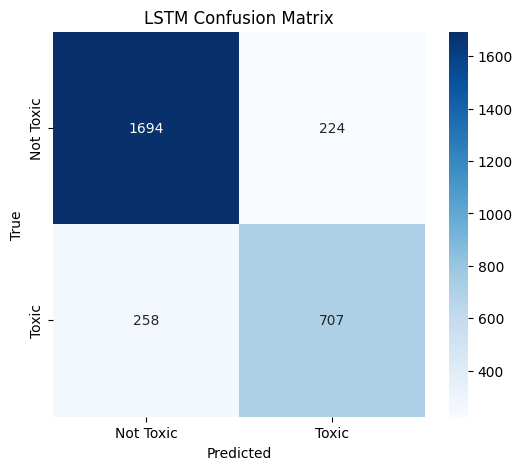

In [118]:
cm = confusion_matrix(all_true, all_preds)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Toxic', 'Toxic'],
            yticklabels=['Not Toxic', 'Toxic'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('LSTM Confusion Matrix')
plt.show()

**4. Naive Bayes**

In [119]:
from sklearn.naive_bayes import MultinomialNB

In [120]:
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0]
}

In [121]:
nb = MultinomialNB()
grid_nb = GridSearchCV(nb, param_grid, cv=5, scoring='f1', n_jobs=-1)

In [122]:
grid_nb.fit(X_train_tfidf, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0]},
             scoring='f1')

In [123]:
y_pred_nb = grid_nb.predict(X_test_tfidf)

In [124]:
print("Classification Report:")
print(classification_report(y_test, y_pred_nb, target_names=["Not Toxic", "Toxic"]))

Classification Report:
              precision    recall  f1-score   support

   Not Toxic       0.86      0.95      0.90      1918
       Toxic       0.88      0.68      0.77       965

    accuracy                           0.86      2883
   macro avg       0.87      0.82      0.84      2883
weighted avg       0.86      0.86      0.86      2883



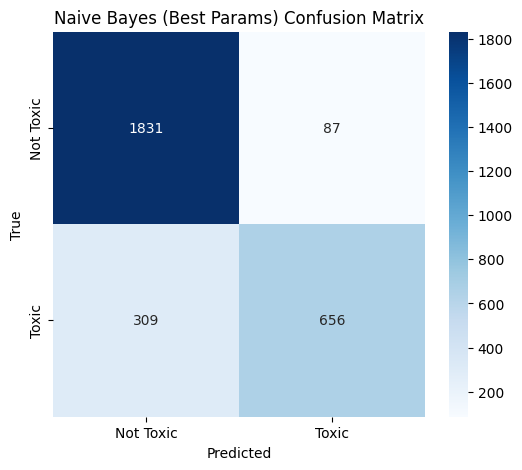

In [125]:
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Toxic', 'Toxic'],
            yticklabels=['Not Toxic', 'Toxic'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Naive Bayes (Best Params) Confusion Matrix')
plt.show()